In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.model_selection import train_test_split

# for chatgpt
import openai
import os

import re # for regex

# for NLP 
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import unicodedata

# for N-grams
import nltk, re, string, collections
from nltk.util import ngrams

# for hierarchical clustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform

# for k mean and DBSCAN clustering
from sklearn.cluster import KMeans, DBSCAN
from scipy.spatial import distance
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [2]:
data_scientist_remote_pd = pd.read_csv('indeed_data scientist_remote.csv')
data_scientist_remote_pd

Title                       Company  \
0                              Data Scientist  PNC Financial Services Group   
1                              Data Scientist  PNC Financial Services Group   
2                              Data Scientist   Shaw Industries Group, Inc.   
3                              Data Scientist                       TVision   
4                     Data Scientist (REMOTE)                    State Farm   
..                                        ...                           ...   
146                     Data Science Engineer                      Sensydia   
147                   Data Scientist (Remote)                     Silverxis   
148  Data Engineer with Machine learning Exp.        Albet Technologies LLC   
149                      Staff Data Scientist       Mothership Technologies   
150           Machine Learning Data Scientist                   AvaSure LLC   

                            Location  Rating                       Date  \
0     Remote in Pittsburgh, PA 15222     3.5          PostedJust posted   
1     Remote in Pittsburgh, PA 15222     3.5          PostedJust posted   
2                             Remote     3.8                PostedToday   
3         Remote in Boston, MA 02109     NaN   PostedPosted 18 days ago   
4    Remote in Bloomington, IL 61701     3.7    PostedPosted 3 days ago   
..                               ...     ...                        ...   
146                           Remote     NaN   PostedPosted 10 days ago   
147                           Remote     3.5  EmployerActive 5 days ago   
148                           Remote     NaN   PostedPosted 12 days ago   
149                           Remote     NaN  PostedPosted 30+ days ago   
150      Remote in Belmont, MI 49306     3.7   PostedPosted 21 days ago   

                        Salary  \
0                          NaN   
1                          NaN   
2                          NaN   
3                          NaN   
4    $69,115 - $169,250 a year   
..                         ...   
146       From $150,000 a year   
147           From $25 an hour   
148    $39.88 - $70.00 an hour   
149                        NaN   
150                        NaN   

                                           Description  \
0    Participates in the data gathering, data proce...   
1    Participates in the data gathering, data proce...   
2    Partner with data scientists across the enterp...   
3    Your choice of comprehensive health benefits f...   
4    Strong communication skills and the ability to...   
..                                                 ...   
146  A Master’s degree in engineering or science, a...   
147  Familiarity with health/public health data.\nF...   
148  Work alongside data scientists and product own...   
149  Make significant and early contributions to th...   
150  The machine learning data scientist provide bu...   

                                                 Links  \
0    https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...   
1    https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...   
2    https://www.indeed.com/company/Shaw-Industries...   
3    https://www.indeed.com/rc/clk?jk=6516da9c2bd81...   
4    https://www.indeed.com/rc/clk?jk=4b1e7c89804f1...   
..                                                 ...   
146  https://www.indeed.com/company/Sensydia/jobs/D...   
147  https://www.indeed.com/company/Silverxis/jobs/...   
148  https://www.indeed.com/company/Albet-Technolog...   
149  https://www.indeed.com/rc/clk?jk=2dca28ccb7473...   
150  https://www.indeed.com/rc/clk?jk=2430871db04a2...   

                                          Descriptions  
0    Job Profile\n\nPosition Overview\n\nAt PNC, ou...  
1    Job Profile\n\nPosition Overview\n\nAt PNC, ou...  
2    We are looking for a data scientist to join ou...  
3    The Company\nTVision measures who watches TV a...  
4    Overview:\nWe are not just offering a job but ...  
..                                           

In [16]:
data_scientist_remote_pd.iloc[0][6]

'Participates in the data gathering, data processing and data mining of large and complex datasets.\nAssists in the presentation of business insights to…'

In [17]:
data_scientist_remote_pd.iloc[0][-1]

"Job Profile\n\nPosition Overview\n\nAt PNC, our people are our greatest differentiator and competitive advantage in the markets we serve. We are all united in delivering the best experience for our customers. We work together each day to foster an inclusive workplace culture where all of our employees feel respected, valued and have an opportunity to contribute to the company’s success. As a Data Scientist you will work within PNC's Retail Technology group. This is a remote position that can sit within the PNC footprint, although it may not be available in all jurisdictions. This is a remote position that can sit within the PNC footprint, although it may not be available in all jurisdictions. Certain job responsibilities may require in-person, in office activities on a regular basis. This position will perform data analytics and work with Retail Technology and business partner to create desired reports. Looking for someone with SAS, SQL, Python experience who works with big data would

In [6]:
# set view to view all
pd.set_option('display.max_columns', None)

In [7]:
# include technical, business, and soft skills
sample_dataset = pd.read_csv("Indeed_sample_dataset.csv")
sample_dataset

Unnamed: 0                                              Title  \
0               0                                     Data Scientist   
1               1                                     Data Scientist   
2               2  Data Science/Statistical Analysis Researcher (...   
3               3  Data Scientist - Medical Diagnostics Projects ...   
4               4  Junior Machine Learning Engineer / Data Scientist   
...           ...                                                ...   
14878        8294     ML Platform - Senior Machine Learning Engineer   
14879        8295  Senior Data Science Manager - Strategic Data S...   
14880        8296           Lead Research Engineer, Machine Learning   
14881        8297                      Senior Marketing Data Analyst   
14882        8298  Data Science Architect - Strategy & Analytics,...   

                    Company                     Salary  \
0      36Eight Technologies                        Nan   
1       Canexia Health Inc.  $53,348 - $129,295 a year   
2             CANN Forecast          $28 - $32 an hour   
3               CorGTA Inc.   $85,000 - $95,000 a year   
4             Virtus Groups   $85,000 - $95,000 a year   
...                     ...                        ...   
14878        TuSimple, Inc.                        Nan   
14879                 Apple                        Nan   
14880               Comcast                        Nan   
14881       Acara Solutions       Up to $90,000 a year   
14882              Deloitte                        Nan   

                        Location  communication  presentation  \
0           Vancouver, BC•Remote              1             0   
1           Vancouver, BC•Remote              1             1   
2            Montréal, QC•Remote              0             0   
3              Ottawa, ON•Remote              0             0   
4                  Vancouver, BC              0             0   
...                          ...            ...           ...   
14878  San Diego, CA+7 locations              0             0   
14879                 Austin, TX              0             1   
14880     Philadelphia, PA 19103              0             1   
14881            East Aurora, NY              0             0   
14882  New York, NY+34 locations              0             0   

       problem solving  project management  consulting  leadership  Excel  \
0                    0                   0           0           0      1   
1                    0                   0           0           0      1   
2                    0                   0           0           0      0   
3                    0                   0           0           0      0   
4                    0                   0           0           0      0   
...                ...                 ...         ...         ...    ...   
14878                0                   0           0           0      0   
14879                0                   0           0           0      1   
14880                0                   0           0           1      0   
14881                0                   0           0           0      1   
14882                0                   0           0           1      0   

       Python  R  Java  C/C++  MATLAB  SAS  SQL  SPSS  Tableau  Power BI  \
0           1  1     0      0       0    0    1     0        0         0   
1           1  1     0      0       0    0    1     0        0         0   
2           1  1     0      0       0    0    0     0        0         0   
3           1  1     0      0       0    0    0     0        0         0   
4           1  1     0      0       0    0    0     0        0         0   
...       ... ..   ...    ...     ...  ...  ...   ...      ...       ...   
14878       1  0     0      0       0    0    0     0        0         0   
14879       1  1     1      0       0    0    1     0        0         0   
14880       1  1     0      1       0    0    0     0  

Part 2

a) Engineer features for clustering analysis

i. Define skills manually from my own knowledge and by using ChatGPT. Use OpenAI’s API to access ChatGPT (gpt-3.5-turbo model) and request a list of skills to use in extraction. For the analysis combine skills list generated manually and those generated with ChatGPT

In [25]:
# define skills manually based on my own knownledge 

skills1 = pd.DataFrame(['Python', 'MySQL', 'data cleaning', 'data visualization', 'data mining','communication', 
                       'conflict solving', 'R', 'attention to details', 'client management', 'time management', 
                       'people management'], columns = ['sentences'])
skills1

sentences
0                 Python
1                  MySQL
2          data cleaning
3     data visualization
4            data mining
5          communication
6       conflict solving
7                      R
8   attention to details
9      client management
10       time management
11     people management

In [5]:
# define skills using ChatGTP for data scientists in North America

# create new secret key from openai website account
# openai.api_key  = '....' #removed after running

# message log
message_log = [{"role": "user", 
                "content": "Send me a list of technical and soft skills required for data scientist jobs in North America"}]

response = openai.ChatCompletion.create(model= "gpt-3.5-turbo", # The name of the OpenAI chatbot model to use
                                        messages=message_log, # The conversation history up to this point, as a list of dictionaries
                                        max_tokens=1000, # The maximum number of tokens (words or subwords) in the generated response
                                        temperature=0.5 # The "creativity" of the generated response (higher temperature = more creative)
)
skills2 = response.choices[0].message.content
print(response.choices[0].message.content)



Technical Skills:
1. Proficiency in programming languages such as Python, R, SQL, and Java
2. Knowledge of statistical modeling and analysis techniques
3. Experience with data visualization tools such as Tableau, Power BI, and D3.js
4. Familiarity with machine learning algorithms and techniques
5. Understanding of big data technologies such as Hadoop, Spark, and NoSQL databases
6. Proficiency in data cleaning, preprocessing, and wrangling techniques
7. Knowledge of cloud computing platforms such as AWS, Azure, and Google Cloud
8. Experience with data mining and data warehousing techniques
9. Familiarity with natural language processing (NLP) and text analytics techniques
10. Understanding of deep learning frameworks such as TensorFlow and Keras

Soft Skills:
1. Strong analytical and problem-solving skills
2. Excellent communication and interpersonal skills
3. Ability to work in a team and collaborate effectively with cross-functional teams
4. Attention to detail and accuracy in data an

In [15]:
# define skills using ChatGTP for data analysts in North America

# create new secret key from openai website account
openai.api_key  = '....' #removed after running

# message log
message_log = [{"role": "user", 
                "content": "Send me a list of skills required for data analyst jobs in North America"}]

response = openai.ChatCompletion.create(model= "gpt-3.5-turbo", # The name of the OpenAI chatbot model to use
                                        messages=message_log, # The conversation history up to this point, as a list of dictionaries
                                        max_tokens=1000, # The maximum number of tokens (words or subwords) in the generated response
                                        temperature=0.5 # The "creativity" of the generated response (higher temperature = more creative)
)
skills3 = response.choices[0].message.content
print(response.choices[0].message.content)

1. Proficiency in statistical analysis and data modeling
2. Knowledge of programming languages such as Python, R, SQL, and SAS
3. Experience with data visualization tools such as Tableau, Power BI, and Qlikview
4. Strong analytical and problem-solving skills
5. Ability to work with large datasets and databases
6. Excellent communication and presentation skills
7. Understanding of machine learning algorithms and techniques
8. Familiarity with data mining and data cleaning techniques
9. Knowledge of data warehousing and ETL processes
10. Familiarity with cloud computing platforms such as AWS, Azure, and Google Cloud
11. Attention to detail and ability to work independently
12. Knowledge of business intelligence tools and concepts
13. Ability to collaborate with cross-functional teams and stakeholders
14. Understanding of data privacy and security regulations.


In [20]:
skills2_pd = pd.DataFrame(skills2.split("\n"), columns = ['sentences']) #split at new line \n

pd.options.display.max_colwidth = 100
skills2_pd

sentences
0                                                                      Technical Skills:
1               1. Proficiency in programming languages such as Python, R, SQL, and Java
2                           2. Knowledge of statistical modeling and analysis techniques
3       3. Experience with data visualization tools such as Tableau, Power BI, and D3.js
4                         4. Familiarity with machine learning algorithms and techniques
5   5. Understanding of big data technologies such as Hadoop, Spark, and NoSQL databases
6               6. Proficiency in data cleaning, preprocessing, and wrangling techniques
7         7. Knowledge of cloud computing platforms such as AWS, Azure, and Google Cloud
8                         8. Experience with data mining and data warehousing techniques
9    9. Familiarity with natural language processing (NLP) and text analytics techniques
10            10. Understanding of deep learning frameworks such as TensorFlow and Keras
11                                                                                      
12                                                                          Soft Skills:
13                                       1. Strong analytical and problem-solving skills
14                                   2. Excellent communication and interpersonal skills
15  3. Ability to work in a team and collaborate effectively with cross-functional teams
16                                  4. Attention to detail and accuracy in data analysis
17                  5. Ability to manage and prioritize multiple projects simultaneously
18                                   6. Strong organizational and time management skills
19   7. Adaptability and flexibility in a fast-paced and constantly evolving environment
20                     8. Creative thinking and ability to generate innovative solutions
21                        9. Strong business acumen and understanding of industry trends
22    10. Ability to translate complex technical concepts to non-technical stakeholders.

In [22]:
skills3_pd = pd.DataFrame(skills3.split("\n"), columns = ['sentences'])
skills3_pd

sentences
0                              1. Proficiency in statistical analysis and data modeling
1                 2. Knowledge of programming languages such as Python, R, SQL, and SAS
2   3. Experience with data visualization tools such as Tableau, Power BI, and Qlikview
3                                       4. Strong analytical and problem-solving skills
4                                  5. Ability to work with large datasets and databases
5                                    6. Excellent communication and presentation skills
6                        7. Understanding of machine learning algorithms and techniques
7                          8. Familiarity with data mining and data cleaning techniques
8                                    9. Knowledge of data warehousing and ETL processes
9   10. Familiarity with cloud computing platforms such as AWS, Azure, and Google Cloud
10                            11. Attention to detail and ability to work independently
11                            12. Knowledge of business intelligence tools and concepts
12              13. Ability to collaborate with cross-functional teams and stakeholders
13                          14. Understanding of data privacy and security regulations.

In [26]:
# combine the 3 skills
skills_combined = pd.concat([skills1, skills2_pd, skills3_pd], ignore_index=True)
skills_combined

sentences
0                                                                                 Python
1                                                                                  MySQL
2                                                                          data cleaning
3                                                                     data visualization
4                                                                            data mining
5                                                                          communication
6                                                                       conflict solving
7                                                                                      R
8                                                                   attention to details
9                                                                      client management
10                                                                       time management
11                                                                     people management
12                                                                     Technical Skills:
13              1. Proficiency in programming languages such as Python, R, SQL, and Java
14                          2. Knowledge of statistical modeling and analysis techniques
15      3. Experience with data visualization tools such as Tableau, Power BI, and D3.js
16                        4. Familiarity with machine learning algorithms and techniques
17  5. Understanding of big data technologies such as Hadoop, Spark, and NoSQL databases
18              6. Proficiency in data cleaning, preprocessing, and wrangling techniques
19        7. Knowledge of cloud computing platforms such as AWS, Azure, and Google Cloud
20                        8. Experience with data mining and data warehousing techniques
21   9. Familiarity with natural language processing (NLP) and text analytics techniques
22            10. Understanding of deep learning frameworks such as TensorFlow and Keras
23                                                                                      
24                                                                          Soft Skills:
25                                       1. Strong analytical and problem-solving skills
26                                   2. Excellent communication and interpersonal skills
27  3. Ability to work in a team and collaborate effectively with cross-functional teams
28                                  4. Attention to detail and accuracy in data analysis
29                  5. Ability to manage and prioritize multiple projects simultaneously
30                                   6. Strong organizational and time management skills
31   7. Adaptability and flexibility in a fast-paced and constantly evolving environment
32                     8. Creative thinking and ability to generate innovative solutions
33                        9. Strong business acumen and understanding of industry trends
34    10. Ability to translate complex technical concepts to non-technical stakeholders.
35                              1. Proficiency in statistical analysis and data modeling
36                 2. Knowledge of programming languages such as Python, R, SQL, and SAS
37   3. Experience with data visualization tools such as Tableau, Power BI, and Qlikview
38                                       4. Strong analytical and problem-solving skills
39                                  5. Ability to work with large datasets and databases
40                                    6. Excellent communication and presentation skills
41                        7. Understanding of machine learning algorithms and techniques
42                          8. Familiarity with data mining and data cleaning techniques
43                                    9. Knowledge of data warehousing and ETL processes
44   10. Familiarity with cloud computing platforms such as AWS, Azure, an

In [29]:
# clean the new dataframe
skills_combined = skills_combined.drop([12,23,24])
skills_combined

sentences
0                                                                                 Python
1                                                                                  MySQL
2                                                                          data cleaning
3                                                                     data visualization
4                                                                            data mining
5                                                                          communication
6                                                                       conflict solving
7                                                                                      R
8                                                                   attention to details
9                                                                      client management
10                                                                       time management
11                                                                     people management
13              1. Proficiency in programming languages such as Python, R, SQL, and Java
14                          2. Knowledge of statistical modeling and analysis techniques
15      3. Experience with data visualization tools such as Tableau, Power BI, and D3.js
16                        4. Familiarity with machine learning algorithms and techniques
17  5. Understanding of big data technologies such as Hadoop, Spark, and NoSQL databases
18              6. Proficiency in data cleaning, preprocessing, and wrangling techniques
19        7. Knowledge of cloud computing platforms such as AWS, Azure, and Google Cloud
20                        8. Experience with data mining and data warehousing techniques
21   9. Familiarity with natural language processing (NLP) and text analytics techniques
22            10. Understanding of deep learning frameworks such as TensorFlow and Keras
25                                       1. Strong analytical and problem-solving skills
26                                   2. Excellent communication and interpersonal skills
27  3. Ability to work in a team and collaborate effectively with cross-functional teams
28                                  4. Attention to detail and accuracy in data analysis
29                  5. Ability to manage and prioritize multiple projects simultaneously
30                                   6. Strong organizational and time management skills
31   7. Adaptability and flexibility in a fast-paced and constantly evolving environment
32                     8. Creative thinking and ability to generate innovative solutions
33                        9. Strong business acumen and understanding of industry trends
34    10. Ability to translate complex technical concepts to non-technical stakeholders.
35                              1. Proficiency in statistical analysis and data modeling
36                 2. Knowledge of programming languages such as Python, R, SQL, and SAS
37   3. Experience with data visualization tools such as Tableau, Power BI, and Qlikview
38                                       4. Strong analytical and problem-solving skills
39                                  5. Ability to work with large datasets and databases
40                                    6. Excellent communication and presentation skills
41                        7. Understanding of machine learning algorithms and techniques
42                          8. Familiarity with data mining and data cleaning techniques
43                                    9. Knowledge of data warehousing and ETL processes
44   10. Familiarity with cloud computing platforms such as AWS, Azure, and Google Cloud
45                             11. Attention to detail and ability to work independently
46                             12. Knowledge of business intelligence tools and concepts
47               13. Ability to collaborate with cross-functional teams an

In [39]:
# clean
# https://towardsdatascience.com/from-dataframe-to-n-grams-e34e29df3460
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [46]:
# convert the pd dataframe to a list and convert to a string
str(skills_combined['sentences'].tolist()) 

"['Python', 'MySQL', 'data cleaning', 'data visualization', 'data mining', 'communication', 'conflict solving', 'R', 'attention to details', 'client management', 'time management', 'people management', '1. Proficiency in programming languages such as Python, R, SQL, and Java', '2. Knowledge of statistical modeling and analysis techniques', '3. Experience with data visualization tools such as Tableau, Power BI, and D3.js', '4. Familiarity with machine learning algorithms and techniques', '5. Understanding of big data technologies such as Hadoop, Spark, and NoSQL databases', '6. Proficiency in data cleaning, preprocessing, and wrangling techniques', '7. Knowledge of cloud computing platforms such as AWS, Azure, and Google Cloud', '8. Experience with data mining and data warehousing techniques', '9. Familiarity with natural language processing (NLP) and text analytics techniques', '10. Understanding of deep learning frameworks such as TensorFlow and Keras', '1. Strong analytical and probl

In [45]:
''.join(str(skills_combined['sentences'].tolist()))

"['Python', 'MySQL', 'data cleaning', 'data visualization', 'data mining', 'communication', 'conflict solving', 'R', 'attention to details', 'client management', 'time management', 'people management', '1. Proficiency in programming languages such as Python, R, SQL, and Java', '2. Knowledge of statistical modeling and analysis techniques', '3. Experience with data visualization tools such as Tableau, Power BI, and D3.js', '4. Familiarity with machine learning algorithms and techniques', '5. Understanding of big data technologies such as Hadoop, Spark, and NoSQL databases', '6. Proficiency in data cleaning, preprocessing, and wrangling techniques', '7. Knowledge of cloud computing platforms such as AWS, Azure, and Google Cloud', '8. Experience with data mining and data warehousing techniques', '9. Familiarity with natural language processing (NLP) and text analytics techniques', '10. Understanding of deep learning frameworks such as TensorFlow and Keras', '1. Strong analytical and probl

In [48]:
# use the basic_clean function to return a cleaner set of words
# store the words in 
words = basic_clean(''.join(str(skills_combined['sentences'].tolist())))
words[:20]

['python',
 'mysql',
 'data',
 'cleaning',
 'data',
 'visualization',
 'data',
 'mining',
 'communication',
 'conflict',
 'solving',
 'r',
 'attention',
 'detail',
 'client',
 'management',
 'time',
 'management',
 'people',
 'management']

In [52]:
nltk.ngrams(words, 2)

In [54]:
pd.Series(nltk.ngrams(words, 2))

0             (python, mysql)
1               (mysql, data)
2            (data, cleaning)
3            (cleaning, data)
4       (data, visualization)
                ...          
248       (14, understanding)
249     (understanding, data)
250           (data, privacy)
251       (privacy, security)
252    (security, regulation)
Length: 253, dtype: object

In [51]:
# N-grams N = 2, count the frequency of each bigram, print the highest 20 bigrams
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:20]

(ability, work)                 3
(data, cleaning)                3
(experience, data)              3
(data, visualization)           3
(data, mining)                  3
(attention, detail)             3
(algorithm, technique)          2
(visualization, tool)           2
(technique, 9)                  2
(tableau, power)                2
(power, bi)                     2
(excellent, communication)      2
(problemsolving, skill)         2
(machine, learning)             2
(learning, algorithm)           2
(database, 6)                   2
(analytical, problemsolving)    2
(strong, analytical)            2
(2, knowledge)                  2
(cloud, computing)              2
dtype: int64

In [55]:
# N-grams N = 3, count the frequency of each bigram, print the highest 20 bigrams
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:20]

(experience, data, visualization)       2
(programming, language, python)         2
(python, r, sql)                        2
(analytical, problemsolving, skill)     2
(strong, analytical, problemsolving)    2
(3, experience, data)                   2
(aws, azure, google)                    2
(data, visualization, tool)             2
(visualization, tool, tableau)          2
(tool, tableau, power)                  2
(tableau, power, bi)                    2
(machine, learning, algorithm)          2
(learning, algorithm, technique)        2
(data, mining, data)                    2
(azure, google, cloud)                  2
(cloud, computing, platform)            2
(computing, platform, aws)              2
(language, python, r)                   2
(platform, aws, azure)                  2
(generate, innovative, solution)        1
dtype: int64

In [81]:
# N-grams N = 1, count the frequency of each bigram, print the highest 20 bigrams
(pd.Series(nltk.ngrams(words, 1)).value_counts())[:20]

(data,)             15
(technique,)         7
(ability,)           7
(knowledge,)         5
(skill,)             5
(understanding,)     5
(cloud,)             4
(strong,)            4
(familiarity,)       4
(management,)        4
(5,)                 3
(3,)                 3
(experience,)        3
(tool,)              3
(learning,)          3
(python,)            3
(analysis,)          3
(team,)              3
(work,)              3
(7,)                 3
dtype: int64

2b. Visualize key information 

Generate at least two visual depictions of the information you’ve collected and extracted (e.g., count of each skill vs. job titles or company name, average salary of skill, etc.)

In [66]:
bar_df = sample_dataset.drop(['Unnamed: 0','Title', 'Company', 'Salary', 'Location'], axis = 1)
bar_df.replace(0, np.nan, inplace=True)

In [67]:
bar_df

communication  presentation  problem solving  project management  \
0                1.0           NaN              NaN                 NaN   
1                1.0           1.0              NaN                 NaN   
2                NaN           NaN              NaN                 NaN   
3                NaN           NaN              NaN                 NaN   
4                NaN           NaN              NaN                 NaN   
...              ...           ...              ...                 ...   
14878            NaN           NaN              NaN                 NaN   
14879            NaN           1.0              NaN                 NaN   
14880            NaN           1.0              NaN                 NaN   
14881            NaN           NaN              NaN                 NaN   
14882            NaN           NaN              NaN                 NaN   

       consulting  leadership  Excel  Python    R  Java  C/C++  MATLAB  SAS  \
0             NaN         NaN    1.0     1.0  1.0   NaN    NaN     NaN  NaN   
1             NaN         NaN    1.0     1.0  1.0   NaN    NaN     NaN  NaN   
2             NaN         NaN    NaN     1.0  1.0   NaN    NaN     NaN  NaN   
3             NaN         NaN    NaN     1.0  1.0   NaN    NaN     NaN  NaN   
4             NaN         NaN    NaN     1.0  1.0   NaN    NaN     NaN  NaN   
...           ...         ...    ...     ...  ...   ...    ...     ...  ...   
14878         NaN         NaN    NaN     1.0  NaN   NaN    NaN     NaN  NaN   
14879         NaN         NaN    1.0     1.0  1.0   1.0    NaN     NaN  NaN   
14880         NaN         1.0    NaN     1.0  1.0   NaN    1.0     NaN  NaN   
14881         NaN         NaN    1.0     NaN  1.0   1.0    NaN     NaN  NaN   
14882         NaN         1.0    NaN     1.0  1.0   1.0    NaN     NaN  NaN   

       SQL  SPSS  Tableau  Power BI  Hadoop  Spark  
0      1.0   NaN      NaN       NaN     NaN    NaN  
1      1.0   NaN      NaN       NaN     NaN    NaN  
2      NaN   NaN      NaN       NaN     NaN    NaN  
3      NaN   NaN      NaN       NaN     NaN    NaN  
4      NaN   NaN      NaN       NaN     NaN    NaN  
...    ...   ...      ...       ...     ...    ...  
14878  NaN   NaN      NaN       NaN     NaN    NaN  
14879  1.0   NaN      NaN       NaN     NaN    1.0  
14880  NaN   NaN      NaN       NaN     NaN    1.0  
14881  1.0   NaN      1.0       NaN     NaN    NaN  
14882  1.0   NaN      NaN       NaN     1.0    1.0  

[14883 rows x 19 columns]

In [59]:
arr = bar_df.sum(axis=0)
arr
# arr is pandas series

communication          7664.0
presentation           3088.0
problem solving        1737.0
project management      804.0
consulting             1427.0
leadership             3558.0
Excel                  4576.0
Python                 8541.0
R                     13770.0
Java                   2788.0
C/C++                   755.0
MATLAB                  278.0
SAS                    1790.0
SQL                    6285.0
SPSS                    194.0
Tableau                2570.0
Power BI                987.0
Hadoop                 1501.0
Spark                  2730.0
dtype: float64

Text(0.5, 1.0, 'Frequency of different skills in job postings')

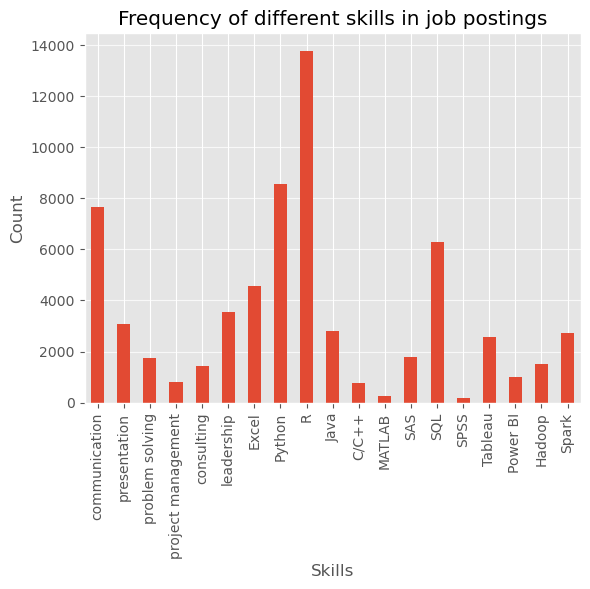

In [69]:
# plot series
arr.plot.bar()
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Skills')
plt.ylabel('Count')
plt.title('Frequency of different skills in job postings')

Text(0.5, 0, '# of Occurances')

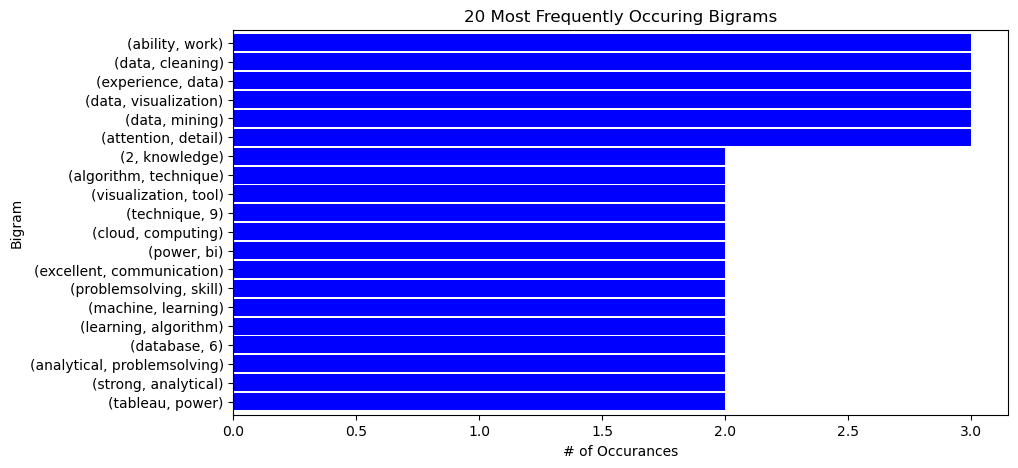

In [57]:
# visulize bigrams
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:20]

bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 5))

plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

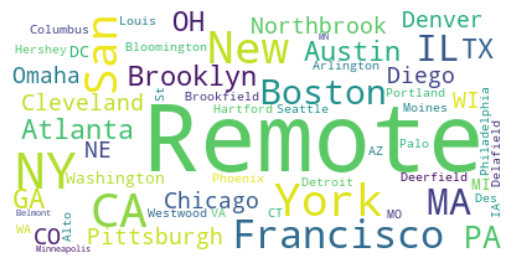

In [102]:
# wordcloud for Location
#Creating the text variable

# the for loop iterates over each string in the 'Location' column and split each string into word
# then each splitted word is joined with a single white space as the delimiter, this helps to remove any extra white space
# then each row of re-joined string is then joined into one big string to be the input of wordcloud 
text = " ".join(" ".join(cat.split()) for cat in data_scientist_remote_pd.Location) # nested function, split and then join each cat in the location column
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

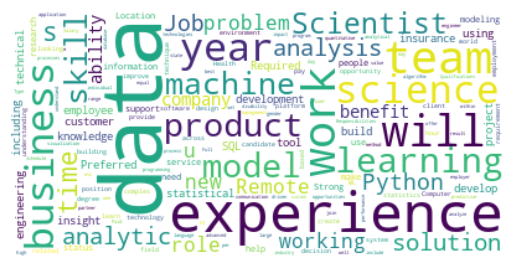

In [104]:
# word cloud of job posting of data scientist

#Creating the text variable
text = " ".join(" ".join(cat.split()) for cat in data_scientist_remote_pd.Descriptions)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

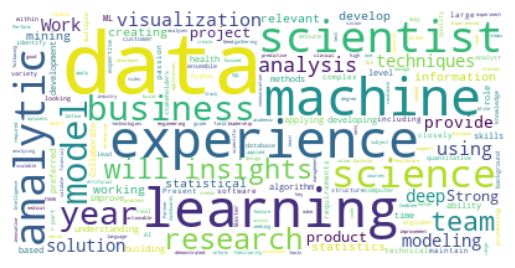

In [103]:
#Creating the text variable
text = " ".join(" ".join(cat.split()) for cat in data_scientist_remote_pd.Description)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Hierarchical clustering implementation

In [8]:
# drop the irrelavant columns in the dataset, only leave the skills for clustering
cluster_data = sample_dataset.drop(['Unnamed: 0', 'Title', 'Company', 'Salary', 'Location'], axis = 1)
cluster_data

communication  presentation  problem solving  project management  \
0                  1             0                0                   0   
1                  1             1                0                   0   
2                  0             0                0                   0   
3                  0             0                0                   0   
4                  0             0                0                   0   
...              ...           ...              ...                 ...   
14878              0             0                0                   0   
14879              0             1                0                   0   
14880              0             1                0                   0   
14881              0             0                0                   0   
14882              0             0                0                   0   

       consulting  leadership  Excel  Python  R  Java  C/C++  MATLAB  SAS  \
0               0           0      1       1  1     0      0       0    0   
1               0           0      1       1  1     0      0       0    0   
2               0           0      0       1  1     0      0       0    0   
3               0           0      0       1  1     0      0       0    0   
4               0           0      0       1  1     0      0       0    0   
...           ...         ...    ...     ... ..   ...    ...     ...  ...   
14878           0           0      0       1  0     0      0       0    0   
14879           0           0      1       1  1     1      0       0    0   
14880           0           1      0       1  1     0      1       0    0   
14881           0           0      1       0  1     1      0       0    0   
14882           0           1      0       1  1     1      0       0    0   

       SQL  SPSS  Tableau  Power BI  Hadoop  Spark  
0        1     0        0         0       0      0  
1        1     0        0         0       0      0  
2        0     0        0         0       0      0  
3        0     0        0         0       0      0  
4        0     0        0         0       0      0  
...    ...   ...      ...       ...     ...    ...  
14878    0     0        0         0       0      0  
14879    1     0        0         0       0      1  
14880    0     0        0         0       0      1  
14881    1     0        1         0       0      0  
14882    1     0        0         0       1      1  

[14883 rows x 19 columns]

In [106]:
# distance matrix
# if the skills are present in the same job posting = 0 distance
# if the skills are not present in the same job posting = + 1 distance

# convert to array like as the input of pdist has to be narray
arr = cluster_data.T.to_numpy() # transpose since I want 19*19 distance matrix
distance = pdist(arr, 'euclidean')
distance.shape

(171,)

In [107]:
distance_matrix  = pd.DataFrame(squareform(distance), columns = [cluster_data.columns], index = [cluster_data.columns])
distance_matrix

communication presentation problem solving  \
communication           0.000000    80.597767       81.123363   
presentation           80.597767     0.000000       61.441029   
problem solving        81.123363    61.441029        0.000000   
project management     85.299472    57.844619       48.093659   
consulting             84.905830    59.422218       49.050994   
leadership             80.361682    68.161573       65.306967   
Excel                  70.270904    71.161787       68.825867   
Python                 86.145226    90.227490       88.532480   
R                      81.080207   103.614671      109.813478   
Java                   88.859440    73.783467       63.174362   
C/C++                  87.948849    60.852280       46.840154   
MATLAB                 86.290208    56.000000       44.665423   
SAS                    83.102347    63.292970       54.396691   
SQL                    81.123363    76.974022       76.798437   
SPSS                   86.959761    55.928526       42.438190   
Tableau                85.767127    64.683847       57.070132   
Power BI               87.367042    58.025856       49.376108   
Hadoop                 87.481427    63.835727       52.478567   
Spark                  85.638776    68.774995       57.818682   

                   project management  consulting  leadership      Excel  \
communication               85.299472   84.905830   80.361682  70.270904   
presentation                57.844619   59.422218   68.161573  71.161787   
problem solving             48.093659   49.050994   65.306967  68.825867   
project management           0.000000   43.988635   59.715995  66.302338   
consulting                  43.988635    0.000000   61.619802  70.078527   
leadership                  59.715995   61.619802    0.000000  73.674962   
Excel                       66.302338   70.078527   73.674962   0.000000   
Python                      92.633687   90.155421   91.624233  91.820477   
R                          114.140265  111.242977  102.489024  96.809090   
Java                        58.600341   62.777384   72.553429  76.000000   
C/C++                       39.433488   46.260134   63.427124  69.792550   
MATLAB                      32.619013   40.657103   61.286214  67.483331   
SAS                         48.559242   50.901866   63.560994  69.224273   
SQL                         79.668061   78.472925   82.079230  79.037966   
SPSS                        31.176915   38.379682   60.564016  67.882251   
Tableau                     56.000000   55.955339   70.809604  73.769913   
Power BI                    40.975602   44.474712   63.725976  69.548544   
Hadoop                      46.443514   49.578221   64.614240  72.242647   
Spark                       58.206529   57.419509   70.696535  77.524190   

                       Python           R        Java       C/C++      MATLAB  \
communication       86.145226   81.080207   88.859440   87.948849   86.290208   
presentation        90.227490  103.614671   73.783467   60.852280   56.000000   
problem solving     88.532480  109.813478   63.174362   46.840154   44.665423   
project management  92.633687  114.140265   58.600341   39.433488   32.619013   
consulting          90.155421  111.242977   62.777384   46.260134   40.657103   
leadership          91.624233  102.489024   72.553429   63.427124   61.286214   
Excel               91.820477   96.809090   76.000000   69.792550   67.483331   
Python               0.000000   76.804948   82.468176   89.766363   91.230477   
R                   76.804948    0.000000  105.659832  114.433387  116.155069   
Java                82.468176  105.659832    0.000000   53.860932   53.944416   
C/C++               89.766363  114.433387   53.860932    0.000000   29.647934   
MATLAB              91.230477  116.155069   53.944416   29.647934    0.000000   
SAS                 92.059763  110.154437   64.498062   49.406477   42.941821   
SQL                 72.746134   89.056162   83.276647   82.7284

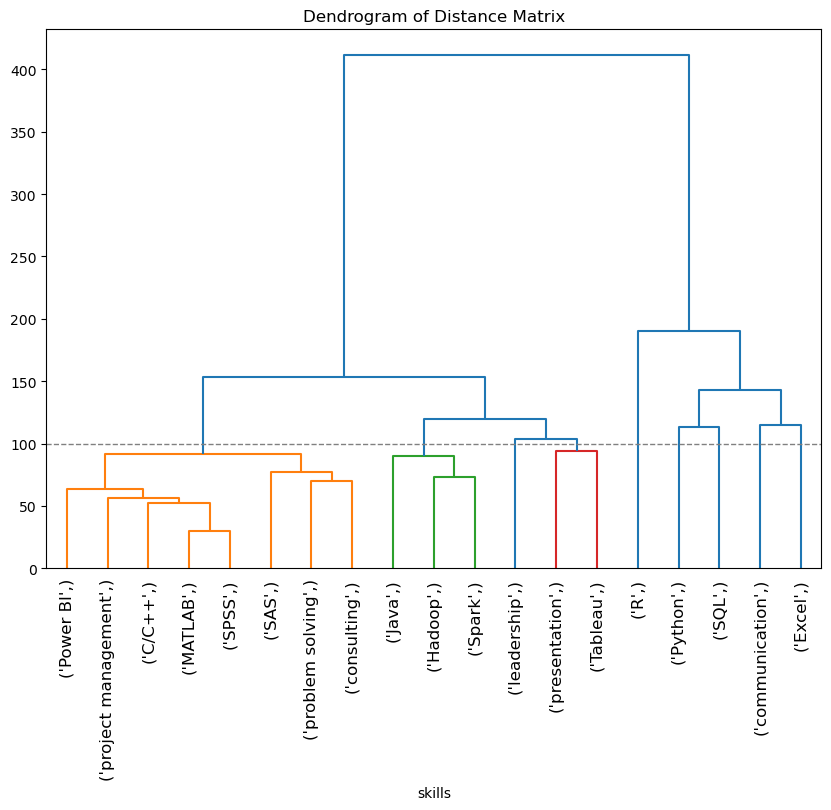

In [108]:
# draw a dendrogram to observe
plt.figure(figsize= (10,7))
plt.title("Dendrogram of Distance Matrix")
dend = shc.dendrogram(shc.linkage(distance_matrix, method = 'ward'), labels=distance_matrix.columns, color_threshold=100) # color threshold for # of clusters
plt.axhline(y=100, c='grey', lw=1, linestyle='dashed')
plt.xticks(rotation = 90)
plt.xlabel("skills")
#plt.ylabel("")

plt.savefig('dendrogram')

### K-means or DBSCAN clustering implementation

feature 1: distance matrix from hierachical clustering

In [65]:
distance_matrix

communication presentation problem solving  \
communication           0.000000    80.597767       81.123363   
presentation           80.597767     0.000000       61.441029   
problem solving        81.123363    61.441029        0.000000   
project management     85.299472    57.844619       48.093659   
consulting             84.905830    59.422218       49.050994   
leadership             80.361682    68.161573       65.306967   
Excel                  70.270904    71.161787       68.825867   
Python                 86.145226    90.227490       88.532480   
R                      81.080207   103.614671      109.813478   
Java                   88.859440    73.783467       63.174362   
C/C++                  87.948849    60.852280       46.840154   
MATLAB                 86.290208    56.000000       44.665423   
SAS                    83.102347    63.292970       54.396691   
SQL                    81.123363    76.974022       76.798437   
SPSS                   86.959761    55.928526       42.438190   
Tableau                85.767127    64.683847       57.070132   
Power BI               87.367042    58.025856       49.376108   
Hadoop                 87.481427    63.835727       52.478567   
Spark                  85.638776    68.774995       57.818682   

                   project management  consulting  leadership      Excel  \
communication               85.299472   84.905830   80.361682  70.270904   
presentation                57.844619   59.422218   68.161573  71.161787   
problem solving             48.093659   49.050994   65.306967  68.825867   
project management           0.000000   43.988635   59.715995  66.302338   
consulting                  43.988635    0.000000   61.619802  70.078527   
leadership                  59.715995   61.619802    0.000000  73.674962   
Excel                       66.302338   70.078527   73.674962   0.000000   
Python                      92.633687   90.155421   91.624233  91.820477   
R                          114.140265  111.242977  102.489024  96.809090   
Java                        58.600341   62.777384   72.553429  76.000000   
C/C++                       39.433488   46.260134   63.427124  69.792550   
MATLAB                      32.619013   40.657103   61.286214  67.483331   
SAS                         48.559242   50.901866   63.560994  69.224273   
SQL                         79.668061   78.472925   82.079230  79.037966   
SPSS                        31.176915   38.379682   60.564016  67.882251   
Tableau                     56.000000   55.955339   70.809604  73.769913   
Power BI                    40.975602   44.474712   63.725976  69.548544   
Hadoop                      46.443514   49.578221   64.614240  72.242647   
Spark                       58.206529   57.419509   70.696535  77.524190   

                       Python           R        Java       C/C++      MATLAB  \
communication       86.145226   81.080207   88.859440   87.948849   86.290208   
presentation        90.227490  103.614671   73.783467   60.852280   56.000000   
problem solving     88.532480  109.813478   63.174362   46.840154   44.665423   
project management  92.633687  114.140265   58.600341   39.433488   32.619013   
consulting          90.155421  111.242977   62.777384   46.260134   40.657103   
leadership          91.624233  102.489024   72.553429   63.427124   61.286214   
Excel               91.820477   96.809090   76.000000   69.792550   67.483331   
Python               0.000000   76.804948   82.468176   89.766363   91.230477   
R                   76.804948    0.000000  105.659832  114.433387  116.155069   
Java                82.468176  105.659832    0.000000   53.860932   53.944416   
C/C++               89.766363  114.433387   53.860932    0.000000   29.647934   
MATLAB              91.230477  116.155069   53.944416   29.647934    0.000000   
SAS                 92.059763  110.154437   64.498062   49.406477   42.941821   
SQL                 72.746134   89.056162   83.276647   82.7284

Build a dataframe for all 10 features:

feature 2: is a soft skill Y/N

In [58]:
# create a od dataframe to feature 2 - 11
features = pd.DataFrame(index = cluster_data.columns, columns = ['is_soft_skill', 'is_technical_skill', 'essential_for_PM', 'essential_for_analyst', 
                                                                 'popular_for_ML', 'is_statistic_focused', 'is_business_focused',
                                                                  'best_for_big_data', 'high_level_programming_language',
                                                                   'no_programming_experience_needed' ])
for i in range(6):
    features.iloc[i][0] = 1
features

is_soft_skill is_technical_skill essential_for_PM  \
communication                  1                NaN              NaN   
presentation                   1                NaN              NaN   
problem solving                1                NaN              NaN   
project management             1                NaN              NaN   
consulting                     1                NaN              NaN   
leadership                     1                NaN              NaN   
Excel                        NaN                NaN              NaN   
Python                       NaN                NaN              NaN   
R                            NaN                NaN              NaN   
Java                         NaN                NaN              NaN   
C/C++                        NaN                NaN              NaN   
MATLAB                       NaN                NaN              NaN   
SAS                          NaN                NaN              NaN   
SQL                          NaN                NaN              NaN   
SPSS                         NaN                NaN              NaN   
Tableau                      NaN                NaN              NaN   
Power BI                     NaN                NaN              NaN   
Hadoop                       NaN                NaN              NaN   
Spark                        NaN                NaN              NaN   
cluster_label                NaN                NaN              NaN   

                   essential_for_analyst popular_for_ML is_statistic_focused  \
communication                        NaN            NaN                  NaN   
presentation                         NaN            NaN                  NaN   
problem solving                      NaN            NaN                  NaN   
project management                   NaN            NaN                  NaN   
consulting                           NaN            NaN                  NaN   
leadership                           NaN            NaN                  NaN   
Excel                                NaN            NaN                  NaN   
Python                               NaN            NaN                  NaN   
R                                    NaN            NaN                  NaN   
Java                                 NaN            NaN                  NaN   
C/C++                                NaN            NaN                  NaN   
MATLAB                               NaN            NaN                  NaN   
SAS                                  NaN            NaN                  NaN   
SQL                                  NaN            NaN                  NaN   
SPSS                                 NaN            NaN                  NaN   
Tableau                              NaN            NaN                  NaN   
Power BI                             NaN            NaN                  NaN   
Hadoop                               NaN            NaN                  NaN   
Spark                                NaN            NaN                  NaN   
cluster_label                        NaN            NaN                  NaN   

                   is_business_focused best_for_big_data  \
communication                      NaN               NaN   
presentation                       NaN               NaN   
problem solving                    NaN               NaN   
project management                 NaN               NaN   
consulting                         NaN               NaN   
leadership                         NaN               NaN   
Excel                              NaN               NaN   
Python                             NaN               NaN   
R                                  NaN               NaN   
Java                               NaN               NaN   
C/C++                              NaN               NaN   
MATLAB                             NaN               NaN   
SAS                                NaN       

feature 3: is_technical_skill

In [59]:
for i in range(6,19):
    features.iloc[i][1] = 1

features

is_soft_skill is_technical_skill essential_for_PM  \
communication                  1                NaN              NaN   
presentation                   1                NaN              NaN   
problem solving                1                NaN              NaN   
project management             1                NaN              NaN   
consulting                     1                NaN              NaN   
leadership                     1                NaN              NaN   
Excel                        NaN                  1              NaN   
Python                       NaN                  1              NaN   
R                            NaN                  1              NaN   
Java                         NaN                  1              NaN   
C/C++                        NaN                  1              NaN   
MATLAB                       NaN                  1              NaN   
SAS                          NaN                  1              NaN   
SQL                          NaN                  1              NaN   
SPSS                         NaN                  1              NaN   
Tableau                      NaN                  1              NaN   
Power BI                     NaN                  1              NaN   
Hadoop                       NaN                  1              NaN   
Spark                        NaN                  1              NaN   
cluster_label                NaN                NaN              NaN   

                   essential_for_analyst popular_for_ML is_statistic_focused  \
communication                        NaN            NaN                  NaN   
presentation                         NaN            NaN                  NaN   
problem solving                      NaN            NaN                  NaN   
project management                   NaN            NaN                  NaN   
consulting                           NaN            NaN                  NaN   
leadership                           NaN            NaN                  NaN   
Excel                                NaN            NaN                  NaN   
Python                               NaN            NaN                  NaN   
R                                    NaN            NaN                  NaN   
Java                                 NaN            NaN                  NaN   
C/C++                                NaN            NaN                  NaN   
MATLAB                               NaN            NaN                  NaN   
SAS                                  NaN            NaN                  NaN   
SQL                                  NaN            NaN                  NaN   
SPSS                                 NaN            NaN                  NaN   
Tableau                              NaN            NaN                  NaN   
Power BI                             NaN            NaN                  NaN   
Hadoop                               NaN            NaN                  NaN   
Spark                                NaN            NaN                  NaN   
cluster_label                        NaN            NaN                  NaN   

                   is_business_focused best_for_big_data  \
communication                      NaN               NaN   
presentation                       NaN               NaN   
problem solving                    NaN               NaN   
project management                 NaN               NaN   
consulting                         NaN               NaN   
leadership                         NaN               NaN   
Excel                              NaN               NaN   
Python                             NaN               NaN   
R                                  NaN               NaN   
Java                               NaN               NaN   
C/C++                              NaN               NaN   
MATLAB                             NaN               NaN   
SAS                                NaN       

feature 4: if it is essential for PM

In [60]:
for i in (0,1,2,3,5,6):
    features.iloc[i][2] = 1

features

is_soft_skill is_technical_skill essential_for_PM  \
communication                  1                NaN                1   
presentation                   1                NaN                1   
problem solving                1                NaN                1   
project management             1                NaN                1   
consulting                     1                NaN              NaN   
leadership                     1                NaN                1   
Excel                        NaN                  1                1   
Python                       NaN                  1              NaN   
R                            NaN                  1              NaN   
Java                         NaN                  1              NaN   
C/C++                        NaN                  1              NaN   
MATLAB                       NaN                  1              NaN   
SAS                          NaN                  1              NaN   
SQL                          NaN                  1              NaN   
SPSS                         NaN                  1              NaN   
Tableau                      NaN                  1              NaN   
Power BI                     NaN                  1              NaN   
Hadoop                       NaN                  1              NaN   
Spark                        NaN                  1              NaN   
cluster_label                NaN                NaN              NaN   

                   essential_for_analyst popular_for_ML is_statistic_focused  \
communication                        NaN            NaN                  NaN   
presentation                         NaN            NaN                  NaN   
problem solving                      NaN            NaN                  NaN   
project management                   NaN            NaN                  NaN   
consulting                           NaN            NaN                  NaN   
leadership                           NaN            NaN                  NaN   
Excel                                NaN            NaN                  NaN   
Python                               NaN            NaN                  NaN   
R                                    NaN            NaN                  NaN   
Java                                 NaN            NaN                  NaN   
C/C++                                NaN            NaN                  NaN   
MATLAB                               NaN            NaN                  NaN   
SAS                                  NaN            NaN                  NaN   
SQL                                  NaN            NaN                  NaN   
SPSS                                 NaN            NaN                  NaN   
Tableau                              NaN            NaN                  NaN   
Power BI                             NaN            NaN                  NaN   
Hadoop                               NaN            NaN                  NaN   
Spark                                NaN            NaN                  NaN   
cluster_label                        NaN            NaN                  NaN   

                   is_business_focused best_for_big_data  \
communication                      NaN               NaN   
presentation                       NaN               NaN   
problem solving                    NaN               NaN   
project management                 NaN               NaN   
consulting                         NaN               NaN   
leadership                         NaN               NaN   
Excel                              NaN               NaN   
Python                             NaN               NaN   
R                                  NaN               NaN   
Java                               NaN               NaN   
C/C++                              NaN               NaN   
MATLAB                             NaN               NaN   
SAS                                NaN       

feature 5: is essential for a data analyst

In [61]:
for i in (1,3,6,16):
    features.iloc[i][3] = 1

features

is_soft_skill is_technical_skill essential_for_PM  \
communication                  1                NaN                1   
presentation                   1                NaN                1   
problem solving                1                NaN                1   
project management             1                NaN                1   
consulting                     1                NaN              NaN   
leadership                     1                NaN                1   
Excel                        NaN                  1                1   
Python                       NaN                  1              NaN   
R                            NaN                  1              NaN   
Java                         NaN                  1              NaN   
C/C++                        NaN                  1              NaN   
MATLAB                       NaN                  1              NaN   
SAS                          NaN                  1              NaN   
SQL                          NaN                  1              NaN   
SPSS                         NaN                  1              NaN   
Tableau                      NaN                  1              NaN   
Power BI                     NaN                  1              NaN   
Hadoop                       NaN                  1              NaN   
Spark                        NaN                  1              NaN   
cluster_label                NaN                NaN              NaN   

                   essential_for_analyst popular_for_ML is_statistic_focused  \
communication                        NaN            NaN                  NaN   
presentation                           1            NaN                  NaN   
problem solving                      NaN            NaN                  NaN   
project management                     1            NaN                  NaN   
consulting                           NaN            NaN                  NaN   
leadership                           NaN            NaN                  NaN   
Excel                                  1            NaN                  NaN   
Python                               NaN            NaN                  NaN   
R                                    NaN            NaN                  NaN   
Java                                 NaN            NaN                  NaN   
C/C++                                NaN            NaN                  NaN   
MATLAB                               NaN            NaN                  NaN   
SAS                                  NaN            NaN                  NaN   
SQL                                  NaN            NaN                  NaN   
SPSS                                 NaN            NaN                  NaN   
Tableau                              NaN            NaN                  NaN   
Power BI                               1            NaN                  NaN   
Hadoop                               NaN            NaN                  NaN   
Spark                                NaN            NaN                  NaN   
cluster_label                        NaN            NaN                  NaN   

                   is_business_focused best_for_big_data  \
communication                      NaN               NaN   
presentation                       NaN               NaN   
problem solving                    NaN               NaN   
project management                 NaN               NaN   
consulting                         NaN               NaN   
leadership                         NaN               NaN   
Excel                              NaN               NaN   
Python                             NaN               NaN   
R                                  NaN               NaN   
Java                               NaN               NaN   
C/C++                              NaN               NaN   
MATLAB                             NaN               NaN   
SAS                                NaN       

feature 6: it is popular for machine learning:

In [62]:
for i in (7,-1):
    features.iloc[i][4] = 1

features

is_soft_skill is_technical_skill essential_for_PM  \
communication                  1                NaN                1   
presentation                   1                NaN                1   
problem solving                1                NaN                1   
project management             1                NaN                1   
consulting                     1                NaN              NaN   
leadership                     1                NaN                1   
Excel                        NaN                  1                1   
Python                       NaN                  1              NaN   
R                            NaN                  1              NaN   
Java                         NaN                  1              NaN   
C/C++                        NaN                  1              NaN   
MATLAB                       NaN                  1              NaN   
SAS                          NaN                  1              NaN   
SQL                          NaN                  1              NaN   
SPSS                         NaN                  1              NaN   
Tableau                      NaN                  1              NaN   
Power BI                     NaN                  1              NaN   
Hadoop                       NaN                  1              NaN   
Spark                        NaN                  1              NaN   
cluster_label                NaN                NaN              NaN   

                   essential_for_analyst popular_for_ML is_statistic_focused  \
communication                        NaN            NaN                  NaN   
presentation                           1            NaN                  NaN   
problem solving                      NaN            NaN                  NaN   
project management                     1            NaN                  NaN   
consulting                           NaN            NaN                  NaN   
leadership                           NaN            NaN                  NaN   
Excel                                  1            NaN                  NaN   
Python                               NaN              1                  NaN   
R                                    NaN            NaN                  NaN   
Java                                 NaN            NaN                  NaN   
C/C++                                NaN            NaN                  NaN   
MATLAB                               NaN            NaN                  NaN   
SAS                                  NaN            NaN                  NaN   
SQL                                  NaN            NaN                  NaN   
SPSS                                 NaN            NaN                  NaN   
Tableau                              NaN            NaN                  NaN   
Power BI                               1            NaN                  NaN   
Hadoop                               NaN            NaN                  NaN   
Spark                                NaN            NaN                  NaN   
cluster_label                        NaN              1                  NaN   

                   is_business_focused best_for_big_data  \
communication                      NaN               NaN   
presentation                       NaN               NaN   
problem solving                    NaN               NaN   
project management                 NaN               NaN   
consulting                         NaN               NaN   
leadership                         NaN               NaN   
Excel                              NaN               NaN   
Python                             NaN               NaN   
R                                  NaN               NaN   
Java                               NaN               NaN   
C/C++                              NaN               NaN   
MATLAB                             NaN               NaN   
SAS                                NaN       

feature 7: is statistics focused

In [63]:
for i in (6,8,12,13,14):
    features.iloc[i][5] = 1

features

is_soft_skill is_technical_skill essential_for_PM  \
communication                  1                NaN                1   
presentation                   1                NaN                1   
problem solving                1                NaN                1   
project management             1                NaN                1   
consulting                     1                NaN              NaN   
leadership                     1                NaN                1   
Excel                        NaN                  1                1   
Python                       NaN                  1              NaN   
R                            NaN                  1              NaN   
Java                         NaN                  1              NaN   
C/C++                        NaN                  1              NaN   
MATLAB                       NaN                  1              NaN   
SAS                          NaN                  1              NaN   
SQL                          NaN                  1              NaN   
SPSS                         NaN                  1              NaN   
Tableau                      NaN                  1              NaN   
Power BI                     NaN                  1              NaN   
Hadoop                       NaN                  1              NaN   
Spark                        NaN                  1              NaN   
cluster_label                NaN                NaN              NaN   

                   essential_for_analyst popular_for_ML is_statistic_focused  \
communication                        NaN            NaN                  NaN   
presentation                           1            NaN                  NaN   
problem solving                      NaN            NaN                  NaN   
project management                     1            NaN                  NaN   
consulting                           NaN            NaN                  NaN   
leadership                           NaN            NaN                  NaN   
Excel                                  1            NaN                    1   
Python                               NaN              1                  NaN   
R                                    NaN            NaN                    1   
Java                                 NaN            NaN                  NaN   
C/C++                                NaN            NaN                  NaN   
MATLAB                               NaN            NaN                  NaN   
SAS                                  NaN            NaN                    1   
SQL                                  NaN            NaN                    1   
SPSS                                 NaN            NaN                    1   
Tableau                              NaN            NaN                  NaN   
Power BI                               1            NaN                  NaN   
Hadoop                               NaN            NaN                  NaN   
Spark                                NaN            NaN                  NaN   
cluster_label                        NaN              1                  NaN   

                   is_business_focused best_for_big_data  \
communication                      NaN               NaN   
presentation                       NaN               NaN   
problem solving                    NaN               NaN   
project management                 NaN               NaN   
consulting                         NaN               NaN   
leadership                         NaN               NaN   
Excel                              NaN               NaN   
Python                             NaN               NaN   
R                                  NaN               NaN   
Java                               NaN               NaN   
C/C++                              NaN               NaN   
MATLAB                             NaN               NaN   
SAS                                NaN       

feature 8: is business focused:

In [64]:
for i in (0,1,-3,-4):
    features.iloc[i][6] = 1

features

is_soft_skill is_technical_skill essential_for_PM  \
communication                  1                NaN                1   
presentation                   1                NaN                1   
problem solving                1                NaN                1   
project management             1                NaN                1   
consulting                     1                NaN              NaN   
leadership                     1                NaN                1   
Excel                        NaN                  1                1   
Python                       NaN                  1              NaN   
R                            NaN                  1              NaN   
Java                         NaN                  1              NaN   
C/C++                        NaN                  1              NaN   
MATLAB                       NaN                  1              NaN   
SAS                          NaN                  1              NaN   
SQL                          NaN                  1              NaN   
SPSS                         NaN                  1              NaN   
Tableau                      NaN                  1              NaN   
Power BI                     NaN                  1              NaN   
Hadoop                       NaN                  1              NaN   
Spark                        NaN                  1              NaN   
cluster_label                NaN                NaN              NaN   

                   essential_for_analyst popular_for_ML is_statistic_focused  \
communication                        NaN            NaN                  NaN   
presentation                           1            NaN                  NaN   
problem solving                      NaN            NaN                  NaN   
project management                     1            NaN                  NaN   
consulting                           NaN            NaN                  NaN   
leadership                           NaN            NaN                  NaN   
Excel                                  1            NaN                    1   
Python                               NaN              1                  NaN   
R                                    NaN            NaN                    1   
Java                                 NaN            NaN                  NaN   
C/C++                                NaN            NaN                  NaN   
MATLAB                               NaN            NaN                  NaN   
SAS                                  NaN            NaN                    1   
SQL                                  NaN            NaN                    1   
SPSS                                 NaN            NaN                    1   
Tableau                              NaN            NaN                  NaN   
Power BI                               1            NaN                  NaN   
Hadoop                               NaN            NaN                  NaN   
Spark                                NaN            NaN                  NaN   
cluster_label                        NaN              1                  NaN   

                   is_business_focused best_for_big_data  \
communication                        1               NaN   
presentation                         1               NaN   
problem solving                    NaN               NaN   
project management                 NaN               NaN   
consulting                         NaN               NaN   
leadership                         NaN               NaN   
Excel                              NaN               NaN   
Python                             NaN               NaN   
R                                  NaN               NaN   
Java                               NaN               NaN   
C/C++                              NaN               NaN   
MATLAB                             NaN               NaN   
SAS                                NaN       

feature 9: is best for big data/database:

In [65]:
for i in (-1,-2,-6):
    features.iloc[i][7] = 1

features

is_soft_skill is_technical_skill essential_for_PM  \
communication                  1                NaN                1   
presentation                   1                NaN                1   
problem solving                1                NaN                1   
project management             1                NaN                1   
consulting                     1                NaN              NaN   
leadership                     1                NaN                1   
Excel                        NaN                  1                1   
Python                       NaN                  1              NaN   
R                            NaN                  1              NaN   
Java                         NaN                  1              NaN   
C/C++                        NaN                  1              NaN   
MATLAB                       NaN                  1              NaN   
SAS                          NaN                  1              NaN   
SQL                          NaN                  1              NaN   
SPSS                         NaN                  1              NaN   
Tableau                      NaN                  1              NaN   
Power BI                     NaN                  1              NaN   
Hadoop                       NaN                  1              NaN   
Spark                        NaN                  1              NaN   
cluster_label                NaN                NaN              NaN   

                   essential_for_analyst popular_for_ML is_statistic_focused  \
communication                        NaN            NaN                  NaN   
presentation                           1            NaN                  NaN   
problem solving                      NaN            NaN                  NaN   
project management                     1            NaN                  NaN   
consulting                           NaN            NaN                  NaN   
leadership                           NaN            NaN                  NaN   
Excel                                  1            NaN                    1   
Python                               NaN              1                  NaN   
R                                    NaN            NaN                    1   
Java                                 NaN            NaN                  NaN   
C/C++                                NaN            NaN                  NaN   
MATLAB                               NaN            NaN                  NaN   
SAS                                  NaN            NaN                    1   
SQL                                  NaN            NaN                    1   
SPSS                                 NaN            NaN                    1   
Tableau                              NaN            NaN                  NaN   
Power BI                               1            NaN                  NaN   
Hadoop                               NaN            NaN                  NaN   
Spark                                NaN            NaN                  NaN   
cluster_label                        NaN              1                  NaN   

                   is_business_focused best_for_big_data  \
communication                        1               NaN   
presentation                         1               NaN   
problem solving                    NaN               NaN   
project management                 NaN               NaN   
consulting                         NaN               NaN   
leadership                         NaN               NaN   
Excel                              NaN               NaN   
Python                             NaN               NaN   
R                                  NaN               NaN   
Java                               NaN               NaN   
C/C++                              NaN               NaN   
MATLAB                             NaN               NaN   
SAS                                NaN       

feature 10: is high level programming language

In [66]:
for i in (7,8,9,10,11,12,13):
    features.iloc[i][8] = 1

features

is_soft_skill is_technical_skill essential_for_PM  \
communication                  1                NaN                1   
presentation                   1                NaN                1   
problem solving                1                NaN                1   
project management             1                NaN                1   
consulting                     1                NaN              NaN   
leadership                     1                NaN                1   
Excel                        NaN                  1                1   
Python                       NaN                  1              NaN   
R                            NaN                  1              NaN   
Java                         NaN                  1              NaN   
C/C++                        NaN                  1              NaN   
MATLAB                       NaN                  1              NaN   
SAS                          NaN                  1              NaN   
SQL                          NaN                  1              NaN   
SPSS                         NaN                  1              NaN   
Tableau                      NaN                  1              NaN   
Power BI                     NaN                  1              NaN   
Hadoop                       NaN                  1              NaN   
Spark                        NaN                  1              NaN   
cluster_label                NaN                NaN              NaN   

                   essential_for_analyst popular_for_ML is_statistic_focused  \
communication                        NaN            NaN                  NaN   
presentation                           1            NaN                  NaN   
problem solving                      NaN            NaN                  NaN   
project management                     1            NaN                  NaN   
consulting                           NaN            NaN                  NaN   
leadership                           NaN            NaN                  NaN   
Excel                                  1            NaN                    1   
Python                               NaN              1                  NaN   
R                                    NaN            NaN                    1   
Java                                 NaN            NaN                  NaN   
C/C++                                NaN            NaN                  NaN   
MATLAB                               NaN            NaN                  NaN   
SAS                                  NaN            NaN                    1   
SQL                                  NaN            NaN                    1   
SPSS                                 NaN            NaN                    1   
Tableau                              NaN            NaN                  NaN   
Power BI                               1            NaN                  NaN   
Hadoop                               NaN            NaN                  NaN   
Spark                                NaN            NaN                  NaN   
cluster_label                        NaN              1                  NaN   

                   is_business_focused best_for_big_data  \
communication                        1               NaN   
presentation                         1               NaN   
problem solving                    NaN               NaN   
project management                 NaN               NaN   
consulting                         NaN               NaN   
leadership                         NaN               NaN   
Excel                              NaN               NaN   
Python                             NaN               NaN   
R                                  NaN               NaN   
Java                               NaN               NaN   
C/C++                              NaN               NaN   
MATLAB                             NaN               NaN   
SAS                                NaN       

feature 11: no programming experience needed:

In [67]:
for i in (6,-3,-4):
    features.iloc[i][9] = 1

features

is_soft_skill is_technical_skill essential_for_PM  \
communication                  1                NaN                1   
presentation                   1                NaN                1   
problem solving                1                NaN                1   
project management             1                NaN                1   
consulting                     1                NaN              NaN   
leadership                     1                NaN                1   
Excel                        NaN                  1                1   
Python                       NaN                  1              NaN   
R                            NaN                  1              NaN   
Java                         NaN                  1              NaN   
C/C++                        NaN                  1              NaN   
MATLAB                       NaN                  1              NaN   
SAS                          NaN                  1              NaN   
SQL                          NaN                  1              NaN   
SPSS                         NaN                  1              NaN   
Tableau                      NaN                  1              NaN   
Power BI                     NaN                  1              NaN   
Hadoop                       NaN                  1              NaN   
Spark                        NaN                  1              NaN   
cluster_label                NaN                NaN              NaN   

                   essential_for_analyst popular_for_ML is_statistic_focused  \
communication                        NaN            NaN                  NaN   
presentation                           1            NaN                  NaN   
problem solving                      NaN            NaN                  NaN   
project management                     1            NaN                  NaN   
consulting                           NaN            NaN                  NaN   
leadership                           NaN            NaN                  NaN   
Excel                                  1            NaN                    1   
Python                               NaN              1                  NaN   
R                                    NaN            NaN                    1   
Java                                 NaN            NaN                  NaN   
C/C++                                NaN            NaN                  NaN   
MATLAB                               NaN            NaN                  NaN   
SAS                                  NaN            NaN                    1   
SQL                                  NaN            NaN                    1   
SPSS                                 NaN            NaN                    1   
Tableau                              NaN            NaN                  NaN   
Power BI                               1            NaN                  NaN   
Hadoop                               NaN            NaN                  NaN   
Spark                                NaN            NaN                  NaN   
cluster_label                        NaN              1                  NaN   

                   is_business_focused best_for_big_data  \
communication                        1               NaN   
presentation                         1               NaN   
problem solving                    NaN               NaN   
project management                 NaN               NaN   
consulting                         NaN               NaN   
leadership                         NaN               NaN   
Excel                              NaN               NaN   
Python                             NaN               NaN   
R                                  NaN               NaN   
Java                               NaN               NaN   
C/C++                              NaN               NaN   
MATLAB                             NaN               NaN   
SAS                                NaN       

Elbow method for kmean cluster

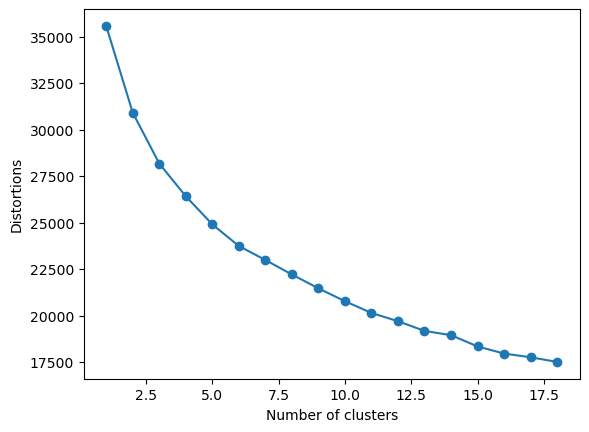

In [79]:
distortions = []

import warnings
warnings.filterwarnings("ignore")

for i in range(1, 19):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(cluster_data)
    distortions.append(kmeans.inertia_)

plt.plot(range(1,19), distortions, marker='o')
plt.ylabel("Distortions")
plt.xlabel("Number of clusters")
plt.show()

In [9]:
# based on the elbow diagram, 7 number of cluster is appropriate. 
kmeans = KMeans(n_clusters=7)
kmeans = kmeans.fit(cluster_data)
     
# add a new column at the end for the cluster labels
cluster_data['cluster_label'] = kmeans.fit_predict(cluster_data)
cluster_data

/Users/hanxingsharpayyu/opt/anaconda3/envs/pearl1/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/hanxingsharpayyu/opt/anaconda3/envs/pearl1/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


communication  presentation  problem solving  project management  \
0                  1             0                0                   0   
1                  1             1                0                   0   
2                  0             0                0                   0   
3                  0             0                0                   0   
4                  0             0                0                   0   
...              ...           ...              ...                 ...   
14878              0             0                0                   0   
14879              0             1                0                   0   
14880              0             1                0                   0   
14881              0             0                0                   0   
14882              0             0                0                   0   

       consulting  leadership  Excel  Python  R  Java  C/C++  MATLAB  SAS  \
0               0           0      1       1  1     0      0       0    0   
1               0           0      1       1  1     0      0       0    0   
2               0           0      0       1  1     0      0       0    0   
3               0           0      0       1  1     0      0       0    0   
4               0           0      0       1  1     0      0       0    0   
...           ...         ...    ...     ... ..   ...    ...     ...  ...   
14878           0           0      0       1  0     0      0       0    0   
14879           0           0      1       1  1     1      0       0    0   
14880           0           1      0       1  1     0      1       0    0   
14881           0           0      1       0  1     1      0       0    0   
14882           0           1      0       1  1     1      0       0    0   

       SQL  SPSS  Tableau  Power BI  Hadoop  Spark  cluster_label  
0        1     0        0         0       0      0              2  
1        1     0        0         0       0      0              2  
2        0     0        0         0       0      0              1  
3        0     0        0         0       0      0              1  
4        0     0        0         0       0      0              1  
...    ...   ...      ...       ...     ...    ...            ...  
14878    0     0        0         0       0      0              1  
14879    1     0        0         0       0      1              3  
14880    0     0        0         0       0      1              0  
14881    1     0        1         0       0      0              2  
14882    1     0        0         0       1      1              3  

[14883 rows x 20 columns]

In [11]:
# to plot a 2D scattered diagram for clustering result, need to use PCA to reduce the dimension first
reduced_cluster_data = PCA(n_components=2).fit_transform(cluster_data)
pca_cluster = pd.DataFrame(reduced_cluster_data, columns=['pca1', 'pca2'])

pca_cluster

pca1      pca2
0     -0.830797  0.594079
1     -0.817977  0.723519
2     -2.003467 -0.339566
3     -2.003467 -0.339566
4     -2.003467 -0.339566
...         ...       ...
14878 -2.019636 -0.453347
14879  0.012399  0.908108
14880 -2.979445  0.170392
14881 -0.906863  0.167584
14882 -0.019173  0.849981

[14883 rows x 2 columns]

In [23]:
cluster_data['cluster_label']

0        2
1        2
2        1
3        1
4        1
        ..
14878    1
14879    3
14880    0
14881    2
14882    3
Name: cluster_label, Length: 14883, dtype: int32

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


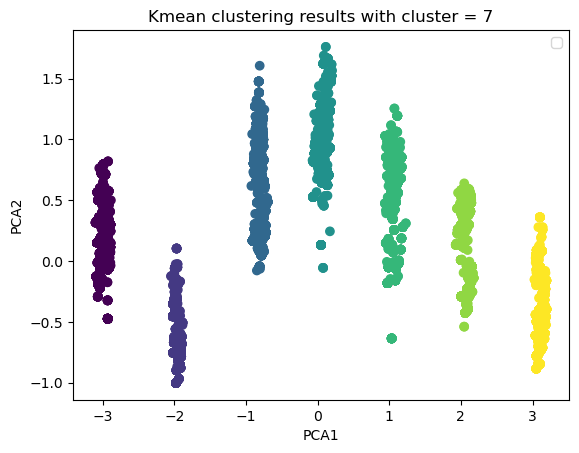

In [24]:
# visualize clustering results
plt.scatter(pca_cluster['pca1'], pca_cluster['pca2'],
            c=cluster_data['cluster_label'])
plt.title("Kmean clustering results with cluster = 7")
plt.xlabel ("PCA1")
plt.ylabel("PCA2")
#plt.legend(cluster_data[['cluster_label']])
plt.legend()
plt.show()

In [34]:
# to observe what rbelong to each cluster, cluster 0:
cluster_0 = cluster_data[cluster_data['cluster_label'] ==0]
# and rank the sum of each skill (column)
sum_0 = cluster_0.sum(axis=0)
sum_0.sort_values(ascending=False)

R                     2120
Python                2046
Java                  1515
communication         1177
Spark                  806
Hadoop                 379
Excel                  337
leadership             334
C/C++                  306
presentation           215
problem solving        206
Tableau                124
SQL                     49
MATLAB                  38
consulting              21
SAS                     10
project management       4
Power BI                 1
SPSS                     0
cluster_label            0
dtype: int64

In [35]:
# to observe what belong to each cluster, cluster 1:
cluster_1 = cluster_data[cluster_data['cluster_label'] ==1]
# and rank the sum of each skill (column)
sum_1 = cluster_1.sum(axis=0)
sum_1.sort_values(ascending=False)

cluster_label         3324
R                     2582
Python                1022
leadership             423
presentation           366
SAS                    228
consulting             214
C/C++                  191
Excel                  172
Java                   160
problem solving        126
project management      94
Spark                   35
Hadoop                  29
MATLAB                  15
Tableau                 12
Power BI                10
SPSS                     5
SQL                      0
communication            0
dtype: int64

In [36]:
# to observe what rbelong to each cluster, cluster 2:
cluster_2 = cluster_data[cluster_data['cluster_label'] ==2]
# and rank the sum of each skill (column)
sum_2 = cluster_2.sum(axis=0)
sum_2.sort_values(ascending=False)

cluster_label         3528
R                     1743
SQL                   1665
communication         1661
Excel                 1588
Python                1027
presentation           828
Tableau                760
leadership             575
problem solving        559
SAS                    501
Power BI               250
consulting             247
Java                   212
project management     161
MATLAB                 134
Hadoop                  82
C/C++                   81
SPSS                    52
Spark                   49
dtype: int64

In [37]:
# to observe what rbelong to each cluster, cluster 3:
cluster_3 = cluster_data[cluster_data['cluster_label'] == 3]
# and rank the sum of each skill (column)
sum_3 = cluster_3.sum(axis=0)
sum_3.sort_values(ascending=False)

cluster_label         4254
SQL                   1381
Spark                 1379
Python                1356
R                     1327
communication         1170
Hadoop                 676
Excel                  453
presentation           444
Java                   430
problem solving        426
leadership             408
consulting             355
SAS                    330
Tableau                237
SPSS                    73
project management      66
Power BI                43
MATLAB                  19
C/C++                    6
dtype: int64

k mean clustering on the feature data

In [69]:
# convert all nan to 0
features = features.fillna(value=0)

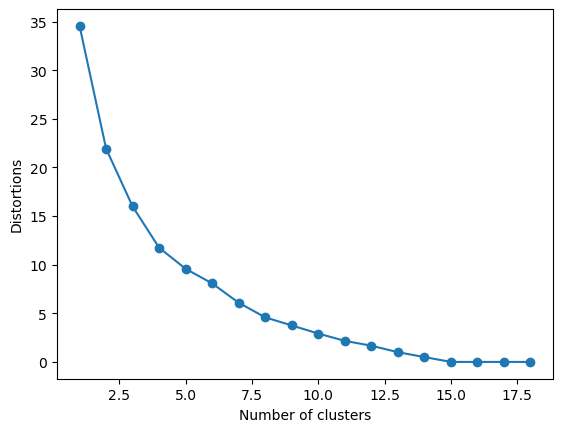

In [70]:
distortions = []

import warnings
warnings.filterwarnings("ignore")

for i in range(1, 19):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(features)
    distortions.append(kmeans.inertia_)

plt.plot(range(1,19), distortions, marker='o')
plt.ylabel("Distortions")
plt.xlabel("Number of clusters")
plt.show()

In [71]:
# based on the elbow diagram, 8 number of cluster is appropriate. 
kmeans = KMeans(n_clusters=8)
kmeans = kmeans.fit(features)
     
# add a new column at the end for the cluster labels
features['cluster_label'] = kmeans.fit_predict(features)
features

is_soft_skill  is_technical_skill  essential_for_PM  \
communication                   1                   0                 1   
presentation                    1                   0                 1   
problem solving                 1                   0                 1   
project management              1                   0                 1   
consulting                      1                   0                 0   
leadership                      1                   0                 1   
Excel                           0                   1                 1   
Python                          0                   1                 0   
R                               0                   1                 0   
Java                            0                   1                 0   
C/C++                           0                   1                 0   
MATLAB                          0                   1                 0   
SAS                             0                   1                 0   
SQL                             0                   1                 0   
SPSS                            0                   1                 0   
Tableau                         0                   1                 0   
Power BI                        0                   1                 0   
Hadoop                          0                   1                 0   
Spark                           0                   1                 0   
cluster_label                   0                   0                 0   

                    essential_for_analyst  popular_for_ML  \
communication                           0               0   
presentation                            1               0   
problem solving                         0               0   
project management                      1               0   
consulting                              0               0   
leadership                              0               0   
Excel                                   1               0   
Python                                  0               1   
R                                       0               0   
Java                                    0               0   
C/C++                                   0               0   
MATLAB                                  0               0   
SAS                                     0               0   
SQL                                     0               0   
SPSS                                    0               0   
Tableau                                 0               0   
Power BI                                1               0   
Hadoop                                  0               0   
Spark                                   0               0   
cluster_label                           0               1   

                    is_statistic_focused  is_business_focused  \
communication                          0                    1   
presentation                           0                    1   
problem solving                        0                    0   
project management                     0                    0   
consulting                             0                    0   
leadership                             0                    0   
Excel                                  1                    0   
Python                                 0                    0   
R                                      1                    0   
Java                                   0                    0   
C/C++                                  0                    0   
MATLAB                                 0                    0   
SAS                                    1                    0   
SQL                                    1                    0   
SPSS                                   1                    0   
Tableau                                0                    0   
Power BI                               0                 

In [74]:
features_0 = features[features['cluster_label']==0]
features_0

is_soft_skill  is_technical_skill  essential_for_PM  \
Python               0                   1                 0   
Java                 0                   1                 0   
C/C++                0                   1                 0   
MATLAB               0                   1                 0   
Tableau              0                   1                 0   

         essential_for_analyst  popular_for_ML  is_statistic_focused  \
Python                       0               1                     0   
Java                         0               0                     0   
C/C++                        0               0                     0   
MATLAB                       0               0                     0   
Tableau                      0               0                     0   

         is_business_focused  best_for_big_data  \
Python                     0                  0   
Java                       0                  0   
C/C++                      0                  0   
MATLAB                     0                  0   
Tableau                    0                  0   

         high_level_programming_language  no_programming_experience_needed  \
Python                                 1                                 0   
Java                                   1                                 0   
C/C++                                  1                                 0   
MATLAB                                 1                                 0   
Tableau                                0                                 0   

         cluster_label  
Python               0  
Java                 0  
C/C++                0  
MATLAB               0  
Tableau              0

In [75]:
features_1 = features[features['cluster_label']==1]
features_1

is_soft_skill  is_technical_skill  essential_for_PM  \
Power BI              0                   1                 0   
Hadoop                0                   1                 0   

          essential_for_analyst  popular_for_ML  is_statistic_focused  \
Power BI                      1               0                     0   
Hadoop                        0               0                     0   

          is_business_focused  best_for_big_data  \
Power BI                    1                  0   
Hadoop                      1                  0   

          high_level_programming_language  no_programming_experience_needed  \
Power BI                                0                                 1   
Hadoop                                  0                                 1   

          cluster_label  
Power BI              1  
Hadoop                1

In [76]:
features_2 = features[features['cluster_label']==2]
features_2

is_soft_skill  is_technical_skill  essential_for_PM  \
presentation                    1                   0                 1   
project management              1                   0                 1   

                    essential_for_analyst  popular_for_ML  \
presentation                            1               0   
project management                      1               0   

                    is_statistic_focused  is_business_focused  \
presentation                           0                    1   
project management                     0                    0   

                    best_for_big_data  high_level_programming_language  \
presentation                        0                                0   
project management                  0                                0   

                    no_programming_experience_needed  cluster_label  
presentation                                       0              2  
project management                                 0              2

In [77]:
features_3 = features[features['cluster_label']==3]
features_3

is_soft_skill  is_technical_skill  essential_for_PM  \
SPSS               0                   1                 0   
Spark              0                   1                 0   

       essential_for_analyst  popular_for_ML  is_statistic_focused  \
SPSS                       0               0                     1   
Spark                      0               0                     0   

       is_business_focused  best_for_big_data  \
SPSS                     0                  1   
Spark                    0                  1   

       high_level_programming_language  no_programming_experience_needed  \
SPSS                                 0                                 0   
Spark                                0                                 0   

       cluster_label  
SPSS               3  
Spark              3

In [78]:
features_4 = features[features['cluster_label']==4]
features_4

is_soft_skill  is_technical_skill  essential_for_PM  \
Excel              0                   1                 1   

       essential_for_analyst  popular_for_ML  is_statistic_focused  \
Excel                      1               0                     1   

       is_business_focused  best_for_big_data  \
Excel                    0                  0   

       high_level_programming_language  no_programming_experience_needed  \
Excel                                0                                 1   

       cluster_label  
Excel              4

In [79]:
features_5 = features[features['cluster_label']==5]
features_5

is_soft_skill  is_technical_skill  essential_for_PM  \
communication                1                   0                 1   
problem solving              1                   0                 1   
consulting                   1                   0                 0   
leadership                   1                   0                 1   

                 essential_for_analyst  popular_for_ML  is_statistic_focused  \
communication                        0               0                     0   
problem solving                      0               0                     0   
consulting                           0               0                     0   
leadership                           0               0                     0   

                 is_business_focused  best_for_big_data  \
communication                      1                  0   
problem solving                    0                  0   
consulting                         0                  0   
leadership                         0                  0   

                 high_level_programming_language  \
communication                                  0   
problem solving                                0   
consulting                                     0   
leadership                                     0   

                 no_programming_experience_needed  cluster_label  
communication                                   0              5  
problem solving                                 0              5  
consulting                                      0              5  
leadership                                      0              5

In [81]:
features_7 = features[features['cluster_label']==7]
features_7

is_soft_skill  is_technical_skill  essential_for_PM  \
R                0                   1                 0   
SAS              0                   1                 0   
SQL              0                   1                 0   

     essential_for_analyst  popular_for_ML  is_statistic_focused  \
R                        0               0                     1   
SAS                      0               0                     1   
SQL                      0               0                     1   

     is_business_focused  best_for_big_data  high_level_programming_language  \
R                      0                  0                                1   
SAS                    0                  0                                1   
SQL                    0                  0                                1   

     no_programming_experience_needed  cluster_label  
R                                   0              7  
SAS                                 0              7  
SQL                                 0              7

In [ ]:
# based on the elbow diagram, 7 number of cluster is appropriate. 
kmeans = KMeans(n_clusters=7)
kmeans = kmeans.fit(cluster_data)
     
# add a new column at the end for the cluster labels
cluster_data['cluster_label'] = kmeans.fit_predict(cluster_data)
cluster_data

In [54]:
# create a dictionary or list of lists that groups the data points by label

cluster_dict = {}
for label in set(cluster_data['cluster_label']):
    cluster_dict[label] = []

for i, label in enumerate(cluster_data['cluster_label']):
    cluster_dict[label].append(i)

print(cluster_dict)

{0: [9, 23, 32, 33, 34, 38, 48, 54, 58, 62, 90, 138, 152, 168, 188, 200, 205, 220, 229, 231, 246, 250, 254, 271, 276, 280, 293, 301, 325, 328, 329, 338, 345, 349, 351, 358, 362, 383, 390, 394, 398, 401, 404, 409, 410, 417, 421, 423, 428, 431, 434, 439, 440, 447, 451, 458, 465, 469, 471, 486, 489, 492, 497, 502, 506, 509, 514, 516, 537, 538, 544, 554, 556, 566, 574, 577, 585, 589, 596, 602, 604, 606, 616, 622, 625, 628, 630, 631, 633, 638, 642, 646, 650, 651, 659, 670, 677, 698, 702, 723, 728, 741, 752, 763, 769, 773, 775, 781, 797, 799, 803, 806, 817, 841, 844, 848, 851, 853, 854, 859, 868, 871, 885, 886, 892, 897, 912, 913, 919, 929, 931, 941, 949, 952, 960, 964, 971, 977, 979, 981, 991, 997, 1000, 1003, 1005, 1006, 1008, 1013, 1017, 1021, 1025, 1026, 1034, 1045, 1052, 1073, 1077, 1098, 1103, 1116, 1127, 1138, 1144, 1148, 1150, 1156, 1172, 1174, 1178, 1181, 1192, 1216, 1219, 1223, 1226, 1228, 1229, 1234, 1243, 1246, 1260, 1261, 1267, 1272, 1275, 1276, 1282, 1287, 1295, 1298, 1302, 131